In [ ]:
!pip install spacy

!pip install mlflow dagshub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 

In [ ]:
import dagshub
import pandas as pd

mount_path = dagshub.storage.mount('Omdena/IREX-El-Salvador-Sentiment')
df_train = pd.read_csv('IREX-El-Salvador-Sentiment/dagshub_storage/train_df_1000_manual.csv')
df_test = pd.read_csv('IREX-El-Salvador-Sentiment/dagshub_storage/test_df_500_manual.csv')

total_df = pd.concat([df_train, df_test], axis=0)
total_df.shape

df_train.rename(columns={'manual labeling': 'manual_labeling'}, inplace=True)
df_test.rename(columns={'manual labeling': 'manual_labeling'}, inplace=True)
total_df.rename(columns={'manual labeling': 'manual_labeling'}, inplace=True)


df_train['manual_labeling_new'] = df_train['manual_labeling'].replace({-1: 0, 0: 1, 1: 2})
df_test['manual_labeling_new'] = df_test['manual_labeling'].replace({-1: 0, 0: 1, 1: 2})
total_df['manual_labeling_new'] = total_df['manual_labeling'].replace({-1: 0, 0: 1, 1: 2})



Successfully mounted DagsHub Storage in 'IREX-El-Salvador-Sentiment' to 
'IREX-El-Salvador-Sentiment/dagshub_storage'.

To unmount, run `dagshub.storage.unmount(repo="Omdena/IREX-El-Salvador-Sentiment", 
path="IREX-El-Salvador-Sentiment/dagshub_storage")`.

In [ ]:
total_df.head()

,Unnamed: 0.1,Unnamed: 0,comment_url,comment_createdAt,comment_id,comment_viewCount,comment_lang,comment_author_createdAt,comment_location,comment_text,...,post_followers,post_verified,post_text,isActor_self__decalred__location__El_Salvador,post_processed_text,actor_affiliation,llama3_output,llama3_reason,manual_labeling,manual_labeling_new
0,302,1420,https://x.com/evinrodriguez/status/17599517342...,1.708440e+09,1.759950e+18,24586.0,es,23/06/2011,NaN,@MarceloLarin1 Es admirable el crecimiento que...,...,64221.0,True,Madre me acaban de pasar el dato que sin FRAUD...,False,madre me acaban de pasar el dato que sin fraud...,Media,1.0,The tweet praises the growth and behavior of t...,1,2
1,166,742,https://x.com/OscarBriceno_/status/17731974128...,1.711598e+09,1.773200e+18,17.0,es,15/08/2009,"Miami, FL",@nayibbukele Entonces deje ese régimen para to...,...,6211015.0,True,Hoy cumplimos 2 años del Régimen de Excepción ...,True,hoy cumplimos 2 años del régimen de excepción ...,Government,-1.0,The tweet expresses a negative sentiment towar...,0,1
2,706,4387,https://x.com/maespinozal/status/1786527311468...,1.714776e+09,1.786530e+18,12.0,es,24/07/2014,NaN,"@suecallejas A todos ? O la orden es para NI, ...",...,132956.0,True,A TODOS los alcaldes y concejales del país: \n...,True,a todos los alcaldes y concejales del país el ...,NaN,-1.0,The tweet expresses a negative sentiment as it...,-1,0
3,629,4083,https://x.com/Grappler91/status/12669263744487...,1.590894e+09,1.266930e+18,NaN,es,27/02/2011,NaN,@MariaLuisaHayem @nayibbukele @AsambleaSV @CON...,...,41321.0,False,"En medio de una pandemia, representantes del G...",True,en medio de una pandemia representantes del go...,Government,0.0,"The tweet presents a neutral sentiment, asking...",0,1
4,27,158,https://x.com/HYanetlvarez1/status/17757003200...,1.712195e+09,1.775700e+18,73.0,es,01/06/2020,NaN,@nayibbukele Pero con un régimen. Cual es la p...,...,6211024.0,True,Durante el medio siglo de guerra que vivió nue...,True,durante el medio siglo de guerra que vivió nue...,Government,0.0,The tweet asks a question about the security p...,0,1


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

import string
import pandas as pd
import spacy
import re
import dagshub


nltk.download('punkt')
nltk.download('stopwords')
spacy.cli.download("es_core_news_sm")






[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:


# Load the spaCy model for Spanish
nlp = spacy.load('es_core_news_sm')

# Initialize the Snowball stemmer for Spanish
stemmer = SnowballStemmer('spanish')

# Define a list of stopwords
stop_words = set(nltk.corpus.stopwords.words('spanish'))

# Function to preprocess text
def preprocess_text(text):
    # Remove special characters (keeping numbers) and convert to lowercase
    text = re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑüÜ0-9]', ' ', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # Reconstruct the text
    processed_text = ' '.join(filtered_tokens)
    return processed_text

# Function to apply lemmatization and stemming to text
def lemmatize_and_stem(text):
    # Lemmatize using spaCy
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]

    # Stem using NLTK SnowballStemmer
    stemmed_tokens = [stemmer.stem(token) for token in lemmatized_tokens]

    # Reconstruct the text
    processed_text = ' '.join(stemmed_tokens)
    return processed_text



In [ ]:
# Apply preprocessing, lemmatization, and stemming to the 'Text' column
total_df['processed_text_final'] = total_df['post_processed_text'].apply(preprocess_text).apply(lemmatize_and_stem)
df_train['processed_text_final'] = df_train['post_processed_text'].apply(preprocess_text).apply(lemmatize_and_stem)
df_test['processed_text_final'] = df_test['post_processed_text'].apply(preprocess_text).apply(lemmatize_and_stem)



In [ ]:
total_df.isnull().sum()

Unnamed: 0.1                                          0
Unnamed: 0                                            0
comment_url                                           0
comment_createdAt                                     0
comment_id                                            0
comment_viewCount                                   453
comment_lang                                          0
comment_author_createdAt                              0
comment_location                                    874
comment_text                                          0
isComment_self__decalred__location__El_Salvador       0
comment_processed_text                                0
post_url                                              0
post_actor_createdAt                                  0
post_id                                               0
post_isReply                                          0
post_inReplyToId                                   1468
post_isRetweet                                  

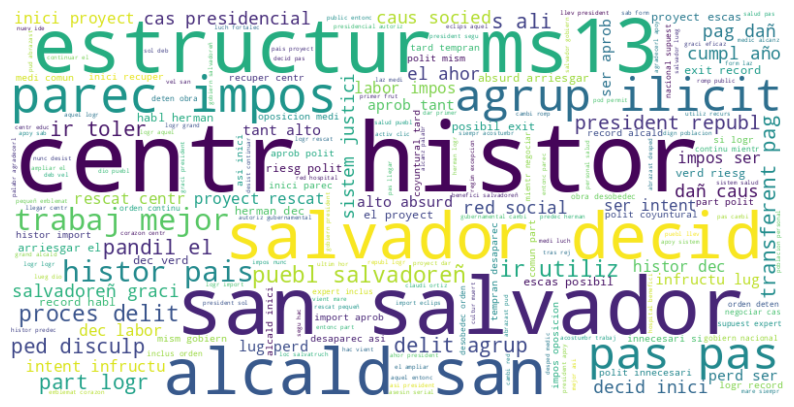

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(dataframe, column_name, width=800, height=400, background_color='white'):
    """
    Generate a word cloud from preprocessed text in a DataFrame column.

    Args:
    - dataframe: The DataFrame containing the text data.
    - column_name: The name of the column containing the preprocessed text.
    - width: Width of the word cloud image.
    - height: Height of the word cloud image.
    - background_color: Background color of the word cloud image.

    Returns:
    - None. Displays the word cloud image.
    """
    # Combine all preprocessed text into a single string
    all_text = ' '.join(dataframe[column_name])

    # Generate a word cloud image
    wordcloud = WordCloud(width=width, height=height, background_color=background_color).generate(all_text)

    # Display the word cloud image
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Example usage
generate_word_cloud(total_df, 'processed_text_final')


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import mlflow
from dagshub import dagshub_logger

In [ ]:

# Initialize DagsHub for MLflow tracking
dagshub.init("IREX-El-Salvador-Sentiment", "Omdena", mlflow=True)

Initialized MLflow to track repo "Omdena/IREX-El-Salvador-Sentiment"

Repository Omdena/IREX-El-Salvador-Sentiment initialized!

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Split the data into training and test sets

X_train = df_train['processed_text_final']
y_train = df_train['manual_labeling_new']

X_test = df_test['processed_text_final']
y_test = df_test['manual_labeling_new']


# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit-transform the training data and transform the test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Check the shape of the TF-IDF matrix
print("Shape of the TF-IDF matrix for training data:", X_train_tfidf.shape)
print("Shape of the TF-IDF matrix for test data:", X_test_tfidf.shape)


Shape of the TF-IDF matrix for training data: (1000, 1000)
Shape of the TF-IDF matrix for test data: (500, 1000)


In [ ]:
# Define a list of classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(),
    'Naive Bayes': MultinomialNB()
}


In [ ]:
# Define a function to train and evaluate the classifier
def train_and_evaluate_classifier(clf, clf_name, X_train, y_train, X_test, y_test):
    # Train the classifier
    clf.fit(X_train, y_train)

    # Evaluate the classifier on training data
    y_pred_train = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)

    # Evaluate the classifier on test data
    y_pred_test = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test, average='weighted')
    precision = precision_score(y_test, y_pred_test, average='weighted')
    recall = recall_score(y_test, y_pred_test, average='weighted')

    # Log the experiment with MLflow and DagsHub
    with mlflow.start_run(run_name=clf_name):
        # Log parameters
        mlflow.log_params(clf.get_params())
        mlflow.log_param("Classifier", clf_name)

        # Log metrics
        mlflow.log_metric("Training Accuracy", train_accuracy)
        mlflow.log_metric("accuracy", test_accuracy)
        mlflow.log_metric("f1_score", f1)
        mlflow.log_metric("precision_score", precision)
        mlflow.log_metric("recall_score", recall)

        # Log the model
        mlflow.sklearn.log_model(clf, f'{clf_name}_model')

        # Add tags
        mlflow.set_tag("estimator_name", clf_name)
        mlflow.set_tag("transformer", "TfidfVectorizer")

    return pd.DataFrame({'Classifier': [clf_name], 'Training Accuracy': [train_accuracy], 'Test Accuracy': [test_accuracy]})


In [ ]:
# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Classifier', 'Training Accuracy', 'Test Accuracy'])

# Iterate over each classifier
for clf_name, clf in classifiers.items():
    # Train and evaluate the classifier
    results = train_and_evaluate_classifier(clf, clf_name, X_train_tfidf, y_train, X_test_tfidf, y_test)

    # Append the results to the DataFrame
    results_df = pd.concat([results_df, results], ignore_index=True)

results_df

,Classifier,Training Accuracy,Test Accuracy
0,KNN,0.587,0.508
1,Logistic Regression,0.640,0.572
2,Random Forest,0.643,0.564
3,Support Vector Machine,0.643,0.570
4,Decision Tree,0.643,0.574
5,XGBoost,0.643,0.564
6,Naive Bayes,0.633,0.574
